In [10]:
from transformers.pipelines import SUPPORTED_TASKS

In [11]:
from transformers.pipelines import SUPPORTED_TASKS
for k,v in SUPPORTED_TASKS.items():
    print(k, v)

audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '55bb623')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

In [12]:
from transformers import pipelines

In [13]:
# 任务类型，再指定模型，创建基于指定模型的Pipeline
pipe = pipeline("text-classification", device=0, model='uer/roberta-base-finetuned-dianping-chinese')

计算GPU运行时间

In [14]:
import torch
import time
times = []

for i in range(100):
    torch.cuda.synchronize()
    start = time.time()
    pipe("我觉得不行")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end-start)
print(sum(times)/100)

0.00757197380065918


# 其他模型使用-目标检测

In [15]:
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection", device=0)

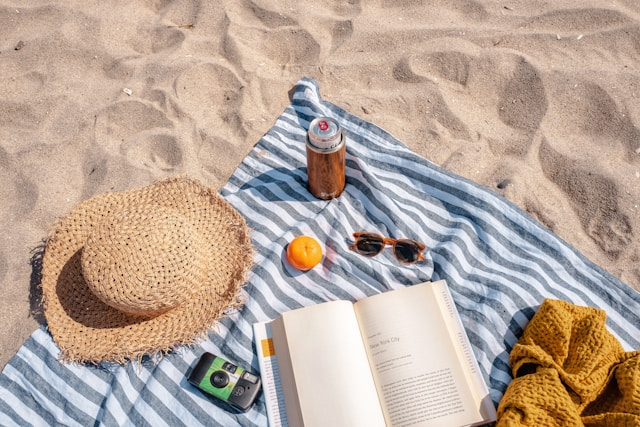

In [16]:
import requests
from PIL import Image

url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
im = Image.open(requests.get(url, stream=True).raw)
im

In [17]:
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions

[{'score': 0.2589319348335266,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 430, 'ymax': 265}},
 {'score': 0.1850159913301468,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 502, 'ymax': 427}},
 {'score': 0.11234820634126663,
  'label': 'hat',
  'box': {'xmin': 39, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

# 将坐标画出来

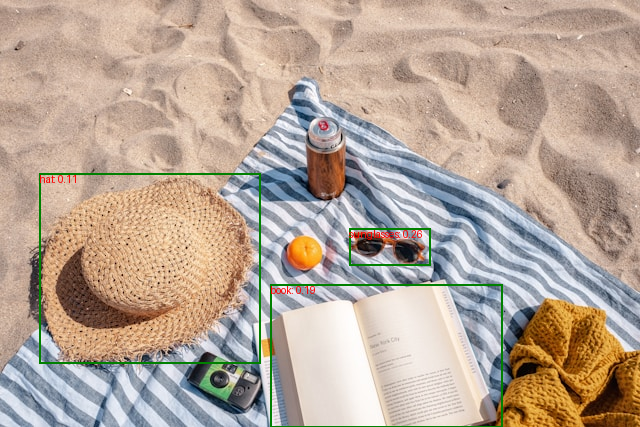

In [18]:
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    # 图像上绘制一个矩形边界框
    draw.rectangle((xmin, ymin, xmax, ymax), outline="green", width=2)
    # 在图像上绘制文本
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im

# piplines背后的故事

## 1. 初始化 Tokenizer
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
## 2. 初始化model
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
## 3. 数据预处理
input_text = "我觉得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
## 4. 模型预测
res = model(**inputs).logits
## 5. 结果后处理
pred = torch.argmax(torcha.softmax(logits, dim=-1)).item()
result = model.config.id2label.get(pred)

In [19]:
from transformers import *
import torch
# 初始化 Tokenizer
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
# 初始化model
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
# 数据预处理
inputs = tokenizer("我觉得不太行！", return_tensors="pt")
#  模型预测
res = model(**inputs)
logits = res.logits
logits = torch.softmax(logits, dim=-1)
# argmax 归一化处理 
pred = torch.argmax(logits).item()
model.config.id2label
# id2label 当前模型中的一个属性看文档
result = model.config.id2label.get(pred)
result


c:\Users\jackw\.conda\envs\transformers\lib\site-packages\transformers\deepspeed.py:24: FutureWarning: transformers.deepspeed module is deprecated and will be removed in a future version. Please import deepspeed modules directly from transformers.integrations
  warnings.warn(
c:\Users\jackw\.conda\envs\transformers\lib\site-packages\torchaudio\backend\utils.py:62: UserWarning: No audio backend is available.
  warnings.warn("No audio backend is available.")
loading configuration file config.json from cache at C:\Users\jackw\.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negativ

'negative (stars 1, 2 and 3)'